# El objetivo de este ejercicio es identificar los costos de un seguro basados en informacion relevante del solicitante

Para este caso utilizaremos las tecnias de preprocesamiento de datos (Los 6 Pasos fundamentales) y varios métodos de regresion lineal (Simple, multiple, polinomial)

In [87]:
# Importamos las librerías necesarias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<img src = 'Imagenes/salud.png'>

### Hacemos la carga y verificamos que haya sido correcta y que no existan duplicados

In [88]:
# cargamos el dataset

df = pd.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [89]:
# contamos los nulls por columna

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### ¡¡Excelente!! no tenemos nulos para este ejercicio, procedemos a crear las variables dummy

<img src = 'Imagenes/chill.jpg'>

Esta creación de variables dummy se ejecuta para las columnas categoricas, (Sex, Smoker, Region)

In [90]:
df['sex'] = (df['sex'] == 'male').astype(int)

In [91]:
df['smoker'] = (df['smoker'] == 'yes').astype(int)

In [92]:
dum = pd.get_dummies(df['region'])
dum = dum.drop(['southwest'], axis = 1)

In [93]:
df = df.drop(['region'], axis = 1)
df = df.join(dum)

In [94]:
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast
0,19,0,27.900,0,1,16884.92400,0,0,0
1,18,1,33.770,1,0,1725.55230,0,0,1
2,28,1,33.000,3,0,4449.46200,0,0,1
3,33,1,22.705,0,0,21984.47061,0,1,0
4,32,1,28.880,0,0,3866.85520,0,1,0


## Vamos a realizar los estadisticos básicos

<img src = 'Imagenes/charts.png'>

In [95]:
df.describe()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.272048
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000


En la descripción del dataframe podemos observar :
* en promedio la gente del estudio se encuentra saludable ya que su BMI es de 30.6
* Para el estudio solo se tomaron personas mayores de 18 años y menores de 64
* En promedio el inviduo tiene 1 hijo/hija

In [96]:
# Analizamos la correlacion entre las variables:

df.corr()['charges'].sort_values()

northwest   -0.039905
northeast    0.006349
sex          0.057292
children     0.067998
southeast    0.073982
bmi          0.198341
age          0.299008
smoker       0.787251
charges      1.000000
Name: charges, dtype: float64

### Las la relacion entre el costo y las personas que fuman es bastante alta

<img src = 'Imagenes/smoker.jpg'>

El secreto del análisis estadístico es realizar las preguntas correctas

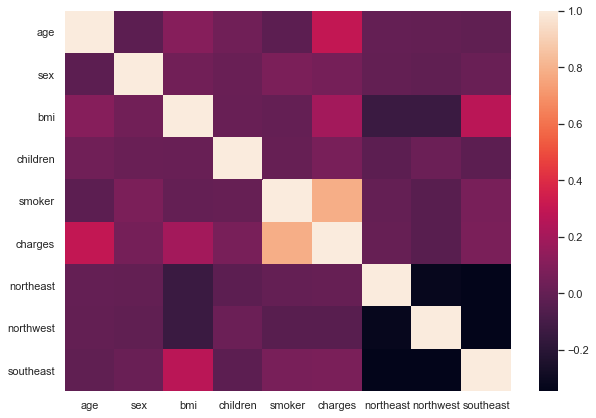

In [101]:
sns.set(rc = {'figure.figsize': (10,7)})
corr_fig = df.corr()
hm = sns.heatmap(corr_fig)

**La matriz de correlación nos ayuda a confirmar la sospecha**

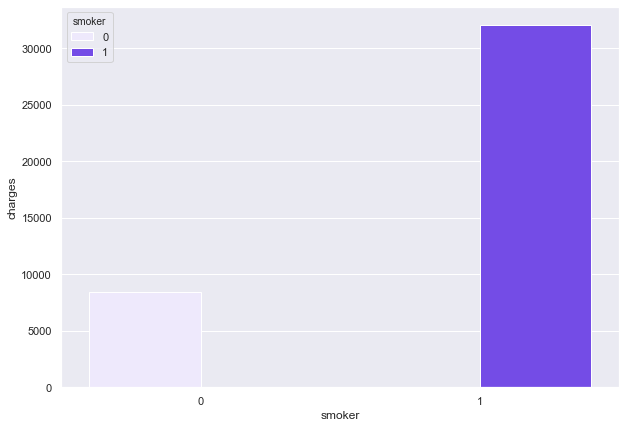

In [105]:
#¿La gente que fuma paga más seguro?

ax = sns.barplot(x = df['smoker'], y = df['charges'], hue = df['smoker'] , ci = None, color = '#6833FF')

*Podemos concluir que efectivamente la gente que fuma paga mas seguro medico*

Text(0.5, 1.0, 'Distribuciond de no fumadores por edad')

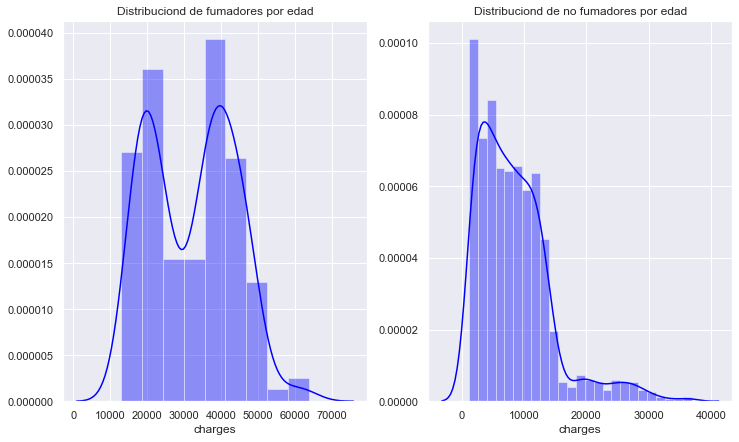

In [134]:
#¿Cual es la distribucion en edades de la gente que fuma?

fig, axis = plt.subplots(1,2, figsize = (12,7))

sns.distplot(df[(df.smoker == 1)]['charges'], color = 'blue', ax = axis[0]).set_title('Distribuciond de fumadores por edad')
sns.distplot(df[(df.smoker == 0)]['charges'], color = 'blue', ax = axis[1]).set_title('Distribuciond de no fumadores por edad')

*Como podemos observar en los graficos, la distribucion nos muestra que hay una gran cantidad de fumadores entre los 18 y los 20 años de edad*